In [1]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention
from collections import defaultdict
import pandas as pd
import json

In [2]:
page_id = '7'
password_response, time_response, survey_response, dids = get_responses()
questions = get_questions()

Total: 100; 
Attentive: 85; Non Attentive: 15


In [3]:
survey_response_df = pd.DataFrame(survey_response)

quest = pd.json_normalize(survey_response_df[page_id]).astype(float)
quest.drop(attention.get(page_id).keys(), axis=1, inplace=True)
# normalize low and high likert scale values
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
normquest = 8 - quest[normqsid]
quest.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
normquest = quest - 4
quest.update(normquest)

new_columns = {}
for qsid in quest.columns:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).replace("'", '"')).get('elements').get(likert_scale)
quest.rename(columns=new_columns, inplace=True)

display(quest.head())
display(quest.describe())

,rewarding,organized,structured,well grouped,ordered,beneficial,helpful,easy,appealing,pleasant,stylish,clear,easy to learn,useful,understandable,beautiful
0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,0.0,-1.0,3.0,2.0,3.0,3.0,1.0
1,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,0.0
3,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,-2.0,2.0,2.0,2.0,1.0
4,-2.0,0.0,1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-2.0,-1.0,-1.0,-2.0,0.0,-2.0,-2.0,0.0


,rewarding,organized,structured,well grouped,ordered,beneficial,helpful,easy,appealing,pleasant,stylish,clear,easy to learn,useful,understandable,beautiful
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.141176,1.882353,1.917647,1.835294,1.376471,1.517647,1.941176,1.400000,1.376471,1.447059,0.552941,1.482353,1.235294,1.505882,1.905882,0.788235
std,1.567170,1.209208,1.226802,1.078436,1.725002,1.694612,1.218439,1.513432,1.397076,1.451648,1.700881,1.687572,1.687821,1.776993,1.332948,1.363592
min,-3.000000,-1.000000,-2.000000,-2.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [4]:
quest['did'] = dids
did_quest = quest.groupby('did').mean()
did_quest

,rewarding,organized,structured,well grouped,ordered,beneficial,helpful,easy,appealing,pleasant,stylish,clear,easy to learn,useful,understandable,beautiful
did,,,,,,,,,,,,,,,,
1,1.090909,1.772727,2.000000,1.818182,1.409091,1.454545,1.863636,1.000000,0.545455,0.545455,0.318182,1.545455,0.954545,1.772727,1.636364,-0.227273
2,1.090909,1.954545,1.772727,1.590909,1.409091,1.636364,2.181818,1.318182,1.772727,1.772727,0.818182,1.636364,1.227273,1.227273,1.954545,1.227273
3,0.900000,1.900000,1.950000,1.950000,1.200000,1.200000,1.750000,1.400000,1.650000,1.600000,0.500000,1.250000,1.000000,1.000000,1.850000,1.000000
4,1.476190,1.904762,1.952381,2.000000,1.476190,1.761905,1.952381,1.904762,1.571429,1.904762,0.571429,1.476190,1.761905,2.000000,2.190476,1.190476


In [5]:
cats = {}
for k, v in quest_map.items():
    temp = did_quest[v]
    cats[k] = temp.mean(axis=1).to_dict()
cats = pd.DataFrame(cats)

cats.index = cats.index.map(get_design)
cats.index.names = ['design']
cats

,Perspicuity,Aesthetics,Usefulness,Clarity
design,,,,
infographics,1.284091,0.295455,1.545455,1.750000
conversation,1.534091,1.397727,1.534091,1.681818
onlinechat,1.375000,1.187500,1.212500,1.750000
reflection,1.833333,1.309524,1.797619,1.833333


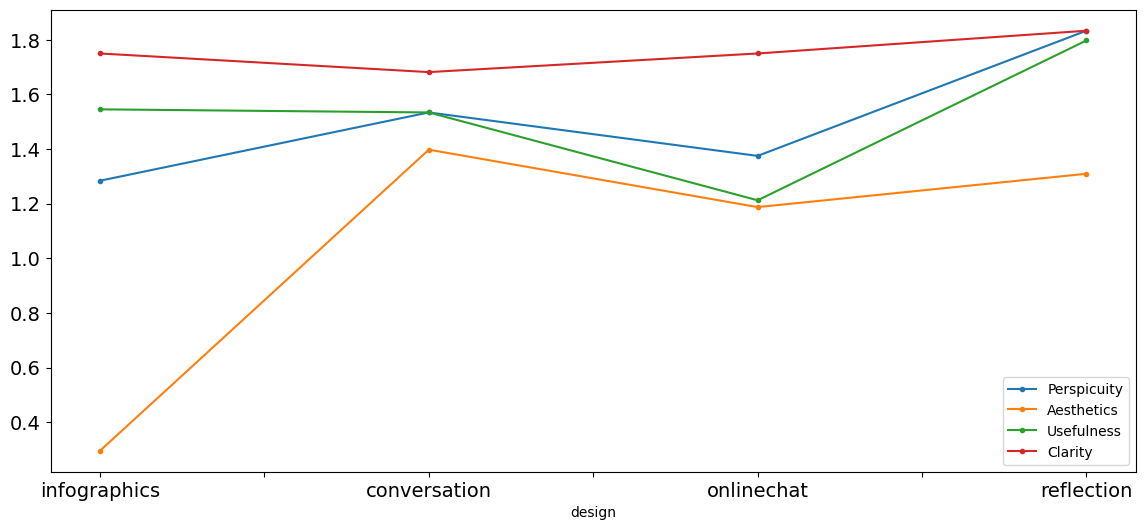

In [6]:
_ = cats.plot(figsize=(14, 6), fontsize=14, style=".-")